In [1]:
import pandas as pd
import numpy as np
from scipy.stats import jarque_bera
import matplotlib.pyplot as plt

In [2]:
# Sample data when using PC
data = pd.read_excel(r'C:/Users/NIGOJ/OneDrive/Desktop/NICO/MAF/Semestre 3/Inversiones en Mercado de Capitales/Archivos Excel/Retornos Apple y NASDAQ.xlsx')
#data.set_index('Date', inplace=True)


# Convert the first column to datetime and set it as the index without a label
data.iloc[:, 0] = pd.to_datetime(data.iloc[:, 0])
data.set_index(data.columns[0], inplace=True)

data['Treasuries 5y'] = data['Treasuries 5y'] / 52

print(data.head(5))  # print first 5 rows of the dataframe

            Retorno Apple  Retorno NASDAQ  Treasuries 5y
Unnamed: 0                                              
2011-09-18         0.0098         -0.0430       0.000165
2011-09-25        -0.0568         -0.0307       0.000184
2011-10-02        -0.0301          0.0297       0.000208
2011-10-09         0.1408          0.0768       0.000215
2011-10-16        -0.0690         -0.0152       0.000205


In [3]:
data.describe(include='all')

,Retorno Apple,Retorno NASDAQ,Treasuries 5y
count,588.000000,588.000000,588.000000
mean,0.004591,0.003048,0.000301
std,0.039111,0.026059,0.000158
min,-0.175300,-0.125200,0.000040
25%,-0.018225,-0.011150,0.000171
50%,0.006000,0.004650,0.000292
75%,0.027125,0.017950,0.000363
max,0.147300,0.094400,0.000836


In [4]:
data.skew()

Retorno Apple    -0.090091
Retorno NASDAQ   -0.279555
Treasuries 5y     0.785855
dtype: float64

In [5]:
# create price series
# Create a DataFrame with prices starting at 100 for each stock
prices = (1 + data).cumprod() * 100

print(prices)

            Retorno Apple  Retorno NASDAQ  Treasuries 5y
Unnamed: 0                                              
2011-09-18     100.980000       95.700000     100.016538
2011-09-25      95.244336       92.762010     100.034907
2011-10-02      92.377481       95.517042     100.055703
2011-10-09     105.384231      102.852750     100.077234
2011-10-16      98.112719      101.289389     100.097711
...                   ...             ...            ...
2022-11-27    1074.899723      537.231476     118.990097
2022-12-04    1033.838554      515.795940     119.073820
2022-12-11     978.218040      501.766291     119.160197
2022-12-18     958.947144      492.032025     119.243208
2022-12-25     944.946516      490.555929     119.331774

[588 rows x 3 columns]


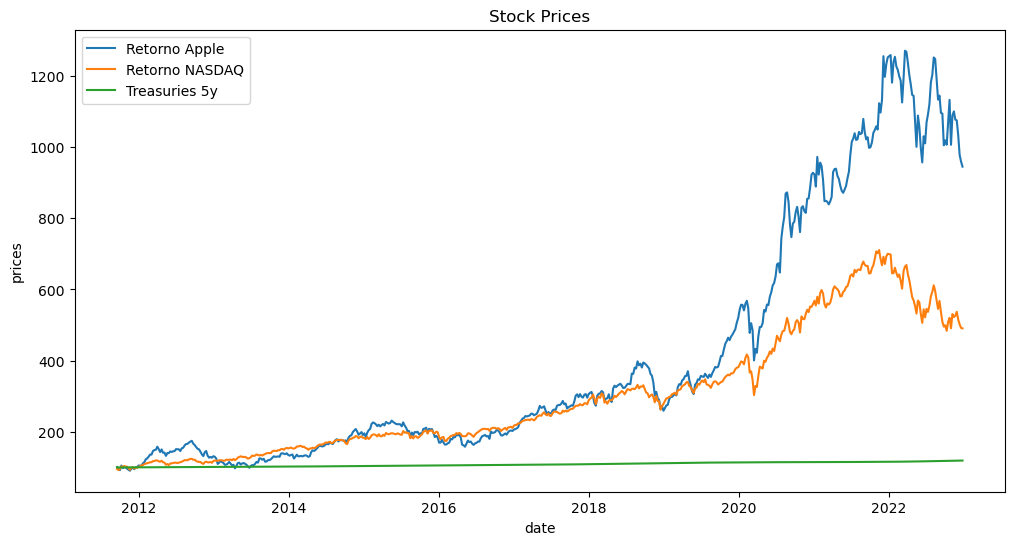

In [6]:
# Increase the size of the graph
plt.figure(figsize=(12, 6))

# plotting the points 
plt.plot(prices)

# naming the x axis
plt.xlabel('date')
# naming the y axis
plt.ylabel('prices')
  
# giving a title to my graph
plt.title('Stock Prices')

# Adding legends based on column names in the DataFrame
plt.legend(prices.columns)

# function to show the plot
plt.show()

In [7]:
# Calculate statistics using Pandas functions
mean = data.mean(numeric_only=True)
std_dev = data.std(numeric_only=True)
skewness = data.skew(numeric_only=True)
kurtosis = data.kurtosis(numeric_only=True)

correlation_matrix = data.corr()
Var_Covar_matrix = data.cov()


# Output the results
print('\033[1m' + "\n***************** Mean *******************" + '\033[0m')
print(mean)
print('\033[1m' + "\n********** Standard Deviation ************" + '\033[0m')
print(std_dev)
print('\033[1m' + "\n*************** Skewness *****************" + '\033[0m')
print(skewness)
print('\033[1m' + "\n*************** Kurtosis *****************" + '\033[0m')
print(kurtosis)

print('\033[1m' + "\n********************* Correlation Matrix ***********************" + '\033[0m')
print(correlation_matrix)

print('\033[1m' + "\n***************** Variance-Covariance Matrix *******************" + '\033[0m')
print(Var_Covar_matrix)



***************** Mean *******************
Retorno Apple     0.004591
Retorno NASDAQ    0.003048
Treasuries 5y     0.000301
dtype: float64

********** Standard Deviation ************
Retorno Apple     0.039111
Retorno NASDAQ    0.026059
Treasuries 5y     0.000158
dtype: float64

*************** Skewness *****************
Retorno Apple    -0.090091
Retorno NASDAQ   -0.279555
Treasuries 5y     0.785855
dtype: float64

*************** Kurtosis *****************
Retorno Apple     1.524284
Retorno NASDAQ    2.177352
Treasuries 5y     0.570927
dtype: float64

********************* Correlation Matrix ***********************
                Retorno Apple  Retorno NASDAQ  Treasuries 5y
Retorno Apple        1.000000        0.738963      -0.063580
Retorno NASDAQ       0.738963        1.000000      -0.081862
Treasuries 5y       -0.063580       -0.081862       1.000000

***************** Variance-Covariance Matrix *******************
                Retorno Apple  Retorno NASDAQ  Treasuries 5y
Ret

In [8]:
def print_green_check():
    # Green color ANSI escape code
    green_color = '\033[32m'
    # Reset ANSI escape code
    reset_color = '\033[0m'
    # Unicode character for checkmark
    check_symbol = '\u2714'

    # Print the green checkmark
    print(green_color + check_symbol + reset_color)

def print_red_x():
    # Red color ANSI escape code
    red_color = '\033[31m'
    # Reset ANSI escape code
    reset_color = '\033[0m'
    # Unicode character for 'X'
    x_symbol = '\u2718'

    # Print the red 'X'
    print(red_color + x_symbol + reset_color)

In [9]:
import math

# Perform the Jarque-Bera test on each column using apply
jb_results = data.apply(jarque_bera)

# Name the rows
jb_results.index = ['Jarque Bera', 'P - value']

# Output the results
print(jb_results)

# Extract p-values from jb_results
p_values = jb_results.apply(lambda x: x[1])

print()

significance_level = 0.05

for column_name in data.columns:
    if math.isnan(p_values[column_name]):
        print(f"It is not possible to calculate the P-value for {column_name}", end=' ')
        print_red_x()
    elif p_values[column_name] < significance_level:
        print(f"P-value for {column_name}: {p_values[column_name]}. The data does not follow a normal distribution.", end=' ')
        print_red_x()
    else:
        print(f"P-value for {column_name}: {p_values[column_name]}. The data follows a normal distribution.", end=' ')
        print_green_check()


             Retorno Apple  Retorno NASDAQ  Treasuries 5y
Jarque Bera   5.600213e+01    1.207334e+02   6.778412e+01
P - value     6.907044e-13    6.068297e-27   1.909265e-15

P-value for Retorno Apple: 6.907044166368798e-13. The data does not follow a normal distribution. ✘
P-value for Retorno NASDAQ: 6.06829702421847e-27. The data does not follow a normal distribution. ✘
P-value for Treasuries 5y: 1.9092647156865955e-15. The data does not follow a normal distribution. ✘


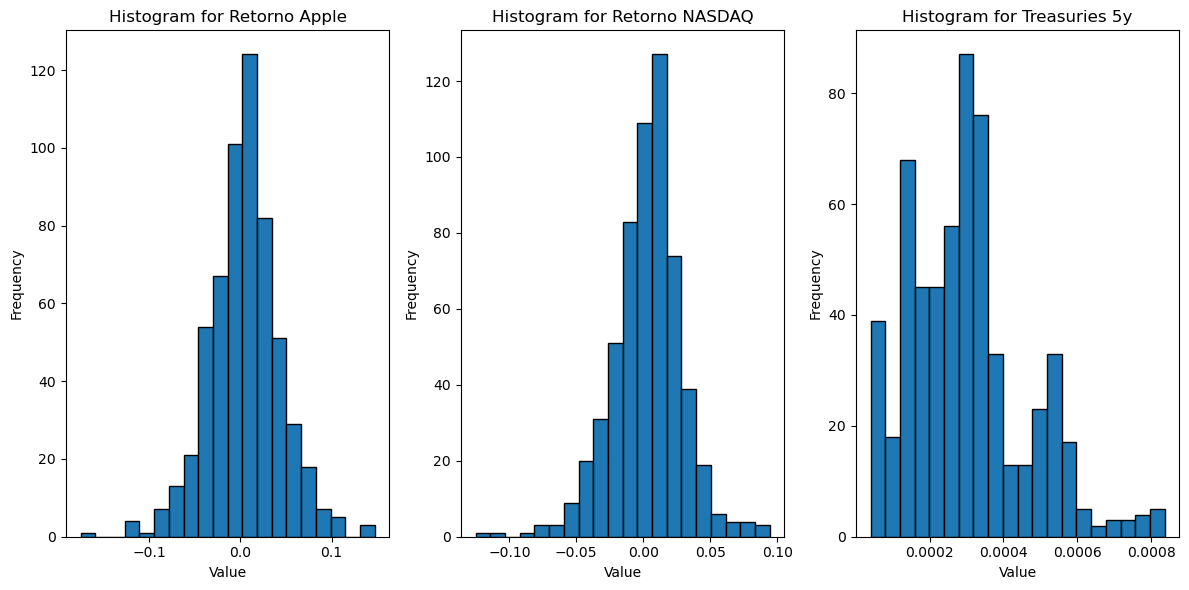

In [10]:
# Plotting the histogram

num_columns = data.shape[1]

# Determine the number of rows and columns for the subplots
ncols = 3
nrows = math.ceil(num_columns / ncols)

# Create subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))

# Flatten the axs array to access each subplot individually
axs = axs.flatten()

for i, column_name in enumerate(data.columns):
    axs[i].hist(data[column_name], bins=20, edgecolor='black')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram for {column_name}')

# Adjust layout to prevent overlap of titles and labels
plt.tight_layout()

# Show the plot
plt.show()